# Introduction

*Importation des packages nécéssaires*

In [ ]:
#install.packages("dplyr")
#install.packages("tidyverse")
#install.packages("readxl")
#install.packages("ggplot")
#install.packages("plotly")
#install.packages("splinetree")
#install.packages("FactoMineR")
#install.packages("factoextra")

library(dplyr)
library(tidyverse)
library(readxl)
library(ggplot2)
library(plotly)
library(FactoMineR)
library(factoextra)
library(splinetree)



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.0     ✔ stringr 1.4.0
✔ tidyr   1.1.3     ✔ forcats 0.5.1
✔ readr   1.4.0     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



ERROR: ignored

# Ingénierie des données

## Importation des données

Dans cette section, on va enrichir nos données avec Enrechissement des données par des données financières ou sociales:
L'idée c'est d'enrechir cette base principale par d'autre data:
Enrichir avec le nombre des vaccinations par jour. comme cela on peut vérifier voir l'impact de la vaccianation sur le nombre d'hospitalisation/Deces...
Aisni qu'on peut enrechir les données avec le des données financière pour avoir le cout d'hopitalisation par jour...

In [ ]:
# Données de base
mainData=as.data.frame(read.csv("https://www.data.gouv.fr/fr/datasets/r/63352e38-d353-4b54-bfd1-f1b3ee1cabd7", sep=";"))
DataCotisDep=as.data.frame(read.csv("https://www.data.gouv.fr/en/datasets/r/8d497f12-d156-45ad-a794-30eff599325b", sep=",", dec="."))
nbVaccinDep=as.data.frame(read.csv("https://www.data.gouv.fr/fr/datasets/r/7969c06d-848e-40cf-9c3c-21b5bd5a874b", sep=";", dec="."))

In [ ]:
dataTemp = read.csv("https://www.data.gouv.fr/fr/datasets/r/dd0df06a-85f2-4621-8b8b-5a3fe195bcd7", sep=";", dec=".", encoding = "UTF-8")

Warning message in scan(file = file, what = what, sep = sep, quote = quote, dec = dec, :
“URL 'https://opendata.reseaux-energies.fr/explore/dataset/temperature-quotidienne-departementale/download?format=csv&timezone=Europe/Berlin&use_labels_for_header=false': Timeout of 60 seconds was reached”


ERROR: ignored

## Préparation et modélisation des données

### Données de base (MainData)

In [ ]:
head(mainData)

,dep,sexe,jour,hosp,rea,HospConv,SSR_USLD,autres,rad,dc
,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,01,0,2020-03-18,2,0,NA,NA,NA,1,0
2,01,1,2020-03-18,1,0,NA,NA,NA,1,0
3,01,2,2020-03-18,1,0,NA,NA,NA,0,0
4,02,0,2020-03-18,41,10,NA,NA,NA,18,11
5,02,1,2020-03-18,19,4,NA,NA,NA,11,6
6,02,2,2020-03-18,22,6,NA,NA,NA,7,5


La colonne sexe presentes les données par sexe (1 Femme, 2 Homme, 0 somme des deux), alors on va utiliser que les données avec sexe==0

In [ ]:
mainData=filter(mainData, sexe == 0)
mainData = subset(mainData, select = -c(2))
summary(mainData)

ERROR: ignored

Le modèle Splinetree n'accepte pas les données de type date dans le modèle, alors il font qu'on ajoute une colonne date.num qui va représenter les données de Date (jour).

In [ ]:
# Calcul du nombre de NA dans les colonnes de la mainBase
colSums(sapply(mainData,is.na))

dep     jour     hosp      rea HospConv SSR_USLD   autres      rad 
       0        0        0        0    36461    36461    36461        0 
      dc 
       0

Alors pour les données de base, on a créé une colonne de plus qui va présenter/remplacer la colonne Jour. 
On a fait un encodage de la colonne Jour par departement.

In [ ]:
str(mainData)

'data.frame':	39390 obs. of  9 variables:
 $ dep     : chr  "01" "02" "03" "04" ...
 $ jour    : chr  "2020-03-18" "2020-03-18" "2020-03-18" "2020-03-18" ...
 $ hosp    : int  2 41 4 3 8 25 12 0 1 5 ...
 $ rea     : int  0 10 0 1 1 1 1 0 1 0 ...
 $ HospConv: int  NA NA NA NA NA NA NA NA NA NA ...
 $ SSR_USLD: int  NA NA NA NA NA NA NA NA NA NA ...
 $ autres  : int  NA NA NA NA NA NA NA NA NA NA ...
 $ rad     : int  1 18 1 2 9 47 0 1 2 0 ...
 $ dc      : int  0 11 0 0 0 2 0 0 0 0 ...


### Nombre de vaccination par département

In [ ]:
head(nbVaccinDep)

,dep,jour,n_tot_dose1,n_tot_dose2,pop,couv_tot_dose1,couv_tot_dose2
,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,00,2021-04-10,2,2,NA,NA,NA
2,01,2021-04-10,85073,26377,656955,12.9,4.0
3,02,2021-04-10,79669,30389,526050,15.1,5.8
4,03,2021-04-10,68130,30373,331315,20.6,9.2
5,04,2021-04-10,31674,11783,165197,19.2,7.1
6,05,2021-04-10,28179,8853,141756,19.9,6.2


On s'interesse pas au données

In [ ]:
# suppression des colonne 6 et 7
nbVaccinDep = subset(nbVaccinDep, select = -c(2,6,7))
# Vérifier si on a des null
colSums(sapply(nbVaccinDep,is.na))

dep n_tot_dose1 n_tot_dose2         pop 
          0           0           0           3

In [ ]:
str(nbVaccinDep)

'data.frame':	106 obs. of  4 variables:
 $ dep        : chr  "00" "01" "02" "03" ...
 $ n_tot_dose1: int  2 85073 79669 68130 31674 28179 241860 57577 48976 30625 ...
 $ n_tot_dose2: int  2 26377 30389 30373 11783 8853 88418 21981 16382 10501 ...
 $ pop        : num  NA 656955 526050 331315 165197 ...


In [ ]:
c(nbVaccinDep)

     dep             n_tot_dose1      n_tot_dose2          pop         
 Length:106         Min.   :     1   Min.   :     0   Min.   :   9961  
 Class :character   1st Qu.: 44898   1st Qu.: 17268   1st Qu.: 278916  
 Mode  :character   Median : 78980   Median : 27784   Median : 520560  
                    Mean   :101486   Mean   : 34787   Mean   : 651544  
                    3rd Qu.:132524   3rd Qu.: 47086   3rd Qu.: 826741  
                    Max.   :428467   Max.   :137565   Max.   :2588988  
                                                      NA's   :3        

### Fond de solidarité de santé par département

#### Présentation des données

Dans le contexte de l'épidémie de COVID-19, l’Etat a mis en place, avec les Régions, un fonds de solidarité doté d’1,7 milliard d’euros pour le mois de mars 2020 qui permettra le versement d’une aide défiscalisée allant jusqu’à 1500 euros aux plus petites entreprises, aux indépendants, aux micro-entrepreneurs et aux professions libérales touchés par la crise du coronavirus. Ce fonds sera maintenu autant que durera l’urgence sanitaire.

Pour obtenir d’autres informations relatives au fonds de solidarité, il est possible de consulter la page d’information disponible sur https://www.impots.gouv.fr/portail/.

Description des données
Le présent jeu de données contient les données exposées sur l'onglet "fonds de solidarité" du tableau de bord.

**Ces données sont issues :**

De la base Sirene des entreprises et de leurs établissements de l'INSEE ;
Du code officiel géographique (COG) de l'INSEE ;
De la nomenclature d'activités française de l'INSEE
De la base de données des aides du fonds de solidarité opérée par la Direction Générale des Finances publiques (DGFIP) pour le volet 1.
Les données informent, à l'échelle régionale et départementale, et pour les volets successifs d'attribution des aides (volet 1, volet 2 et volet 3 à venir) :

le nombre d'aides accordées ;
le montant total des aides accordées en euros ;
le secteur d'activité des entreprises bénéficiaires (via une section du code NAF).
À ce jour, les données du volet 1 du fonds de solidarité sont disponibles.

Les données sont mises à jour sur une base quotidienne, ce qui correspond à la fréquence de mise à jour du tableau de bord et sont disponibles au format CSV.

Le jeu de données a vocation à être enrichi dans les semaines à venir.


Les jeux de données utilisés sont:

Les données hospitalières relatives à l'épidémie du COVID-19 par département et sexe du patient : nombre de patients hospitalisés, nombre de personnes actuellement en réanimation ou soins intensifs, nombre de personnes actuellement en Soins de Suite et de Réadaptation (SSR) ou Unités de Soins de Longue Durée(USLD), nombre de personnes actuellement en hospitalisation conventionnelle, nombre actuellement de personnes hospitalisées dans un autre type de service ou nombre cumulé de personnes retournées à domicile, nombre cumulé de personnes décédées.

Les données hospitalières relatives à l'épidémie du COVID-19 par région, et classe d'âge du patient : nombre de patients hospitalisés, nombre de personnes actuellement en réanimation ou soins intensifs, nombre de personnes actuellement en Soins de Suite et de Réadaptation (SSR) ou Unités de Soins de Longue Durée(USLD), nombre de personnes actuellement en hospitalisation conventionnelle, nombre actuellement de personnes hospitalisées dans un autre type de service, nombre cumulé de personnes retournées à domicile, nombre cumulé de personnes décédées.

Les données hospitalières quotidiennes relatives à l'épidémie du COVID-19 par département : nombre quotidien de personnes nouvellement hospitalisées, nombre quotidien de nouvelles admissions en réanimation, nombre quotidien de personnes nouvellement décédées, nombre quotidien de nouveaux retours à domicile.

Les données relatives aux établissements hospitaliers par département : nombre cumulé de services ayant déclaré au moins un cas.

Les données relatives à les nouvelles admissions en réanimation par région : nombre de nouveaux patients admis en réanimation dans les 24 dernières heures.

#### Préparation des données

In [ ]:
str(DataCotisDep)

'data.frame':	1679 obs. of  11 variables:
 $ dispositif         : chr  "Fonds de solidarité" "Fonds de solidarité" "Fonds de solidarité" "Fonds de solidarité" ...
 $ volet              : chr  "VOLET1" "VOLET1" "VOLET1" "VOLET1" ...
 $ nombre_aides       : int  940 2222 145 5973 8342 1759 10432 924 386 1290 ...
 $ nombre_entreprises : int  301 757 53 2358 2562 394 1621 234 115 404 ...
 $ montant_total      : num  1915331 4263228 234667 9280745 18904870 ...
 $ reg                : int  84 84 84 84 84 84 84 84 84 84 ...
 $ libelle_region     : chr  "Auvergne-Rhône-Alpes" "Auvergne-Rhône-Alpes" "Auvergne-Rhône-Alpes" "Auvergne-Rhône-Alpes" ...
 $ dep                : chr  "01" "01" "01" "01" ...
 $ libelle_departement: chr  "Ain" "Ain" "Ain" "Ain" ...
 $ code_section       : chr  "A" "C" "E" "F" ...
 $ libelle_section    : chr  "Agriculture, sylviculture et pêche" "Industrie manufacturière" "Production et distribution d'eau ; assainissement, gestion des déchets et dépollution" "Constructio

On va prendre que les variables suivantes:

In [ ]:
DataCotisDep = subset(DataCotisDep, select = -c(1,2,4,6,7,10))
head(DataCotisDep)

,nombre_aides,montant_total,dep,libelle_departement,libelle_section
,<int>,<dbl>,<chr>,<chr>,<chr>
1,940,1915331,01,Ain,"Agriculture, sylviculture et pêche"
2,2222,4263228,01,Ain,Industrie manufacturière
3,145,234667,01,Ain,"Production et distribution d'eau ; assainissement, gestion des déchets et dépollution"
4,5973,9280745,01,Ain,Construction
5,8342,18904870,01,Ain,Commerce
6,1759,3528714,01,Ain,Transports et entreposage


Ce qui nous intéresse c'est que les montants lié à la santé.

In [ ]:
DataCotisDep$libelle_section=as.factor(DataCotisDep$libelle_section)
DataCotisSanteDep=filter(DataCotisDep,libelle_section  == "Santé humaine et action sociale")
head(DataCotisSanteDep)

,nombre_aides,montant_total,dep,libelle_departement,libelle_section
,<int>,<dbl>,<chr>,<chr>,<fct>
1,3144,4069561,01,Ain,Santé humaine et action sociale
2,1558,2051441,03,Allier,Santé humaine et action sociale
3,2106,2612907,07,Ardèche,Santé humaine et action sociale
4,562,787557,15,Cantal,Santé humaine et action sociale
5,4096,5394170,26,Drôme,Santé humaine et action sociale
6,1183,1554682,43,Haute-Loire,Santé humaine et action sociale


In [ ]:
DataCotisSanteDep = subset(DataCotisSanteDep, select = -c(5))
str(DataCotisSanteDep)

'data.frame':	101 obs. of  4 variables:
 $ nombre_aides       : int  3144 1558 2106 562 4096 1183 6703 9128 4103 3708 ...
 $ montant_total      : num  4069561 2051441 2612907 787557 5394170 ...
 $ dep                : chr  "01" "03" "07" "15" ...
 $ libelle_departement: chr  "Ain" "Allier" "Ardèche" "Cantal" ...


In [ ]:
colSums(sapply(mainData,is.na))

dep     jour     hosp      rea HospConv SSR_USLD   autres      rad 
       0        0        0        0    36461    36461    36461        0 
      dc 
       0

### Données température




Ce document nous donne la température journalière pour chaque département français.  Il nous donne la température minimum, la temparture maximum et la température moyenne pour chaque journée journée.

In [ ]:
colnames(dataTemp) = c("jour","dep","nom_dep","tmin","tmax","tmoy")
head(dataTemp)

,jour,dep,nom_dep,tmin,tmax,tmoy
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,2018-04-15,23,Creuse,1.50,17.80,9.65
2,2018-04-15,24,Dordogne,3.45,20.20,11.82
3,2018-04-15,30,Gard,7.90,18.73,13.32
4,2018-04-15,35,Ille-et-Vilaine,8.40,16.55,12.48
5,2018-04-15,37,Indre-et-Loire,7.20,18.30,12.75
6,2018-04-15,49,Maine-et-Loire,8.20,17.10,12.65


In [ ]:
colSums(sapply(dataTemp,is.na))

jour     dep nom_dep    tmin    tmax    tmoy 
      0       0       0       0       0       0

In [ ]:
str(dataTemp)

'data.frame':	113862 obs. of  6 variables:
 $ jour   : chr  "2018-04-15" "2018-04-15" "2018-04-15" "2018-04-15" ...
 $ dep    : chr  "23" "24" "30" "35" ...
 $ nom_dep: chr  "Creuse" "Dordogne" "Gard" "Ille-et-Vilaine" ...
 $ tmin   : num  1.5 3.45 7.9 8.4 7.2 8.2 7 4 6.4 6.7 ...
 $ tmax   : num  17.8 20.2 18.7 16.6 18.3 ...
 $ tmoy   : num  9.65 11.82 13.32 12.48 12.75 ...



### Table de fait

Dans cette section on va créer notre table de fait qui va présenter notre datamart. Cette table de fait va être utilisée dans la partie suivante, lié à la visualisation et au modèle splinetree.
Les tables suivantes vont présenter les tables de base utilisé par la création de la table de fait.

In [ ]:
str(mainData)

'data.frame':	39390 obs. of  9 variables:
 $ dep     : chr  "01" "02" "03" "04" ...
 $ jour    : chr  "2020-03-18" "2020-03-18" "2020-03-18" "2020-03-18" ...
 $ hosp    : int  2 41 4 3 8 25 12 0 1 5 ...
 $ rea     : int  0 10 0 1 1 1 1 0 1 0 ...
 $ HospConv: int  NA NA NA NA NA NA NA NA NA NA ...
 $ SSR_USLD: int  NA NA NA NA NA NA NA NA NA NA ...
 $ autres  : int  NA NA NA NA NA NA NA NA NA NA ...
 $ rad     : int  1 18 1 2 9 47 0 1 2 0 ...
 $ dc      : int  0 11 0 0 0 2 0 0 0 0 ...


In [ ]:
str(nbVaccinDep)

'data.frame':	106 obs. of  4 variables:
 $ dep        : chr  "00" "01" "02" "03" ...
 $ n_tot_dose1: int  2 85073 79669 68130 31674 28179 241860 57577 48976 30625 ...
 $ n_tot_dose2: int  2 26377 30389 30373 11783 8853 88418 21981 16382 10501 ...
 $ pop        : num  NA 656955 526050 331315 165197 ...


In [ ]:
str(DataCotisSanteDep)

'data.frame':	101 obs. of  4 variables:
 $ nombre_aides       : int  3144 1558 2106 562 4096 1183 6703 9128 4103 3708 ...
 $ montant_total      : num  4069561 2051441 2612907 787557 5394170 ...
 $ dep                : chr  "01" "03" "07" "15" ...
 $ libelle_departement: chr  "Ain" "Allier" "Ardèche" "Cantal" ...


In [ ]:
str(dataTemp)

'data.frame':	113862 obs. of  6 variables:
 $ jour   : chr  "2018-04-15" "2018-04-15" "2018-04-15" "2018-04-15" ...
 $ dep    : chr  "23" "24" "30" "35" ...
 $ nom_dep: chr  "Creuse" "Dordogne" "Gard" "Ille-et-Vilaine" ...
 $ tmin   : num  1.5 3.45 7.9 8.4 7.2 8.2 7 4 6.4 6.7 ...
 $ tmax   : num  17.8 20.2 18.7 16.6 18.3 ...
 $ tmoy   : num  9.65 11.82 13.32 12.48 12.75 ...


Le code suivant va nous permettre à fusionner toutes les varibale en fesant un join sur la colonne "dep" et "Jour".

In [ ]:
# Join entre mainData et nbVaccinDep, DataCotisSanteDep et dataTemp
dataf= mainData %>% left_join(nbVaccinDep, by="dep")
dataf= dataf %>% left_join(DataCotisSanteDep, by="dep")

dataf = dataf %>% left_join(dataTemp, by=c("dep","jour"))
dataf=as.data.frame(dataf)
str(dataf)

'data.frame':	39390 obs. of  19 variables:
 $ dep                : chr  "01" "02" "03" "04" ...
 $ jour               : chr  "2020-03-18" "2020-03-18" "2020-03-18" "2020-03-18" ...
 $ hosp               : int  2 41 4 3 8 25 12 0 1 5 ...
 $ rea                : int  0 10 0 1 1 1 1 0 1 0 ...
 $ HospConv           : int  NA NA NA NA NA NA NA NA NA NA ...
 $ SSR_USLD           : int  NA NA NA NA NA NA NA NA NA NA ...
 $ autres             : int  NA NA NA NA NA NA NA NA NA NA ...
 $ rad                : int  1 18 1 2 9 47 0 1 2 0 ...
 $ dc                 : int  0 11 0 0 0 2 0 0 0 0 ...
 $ n_tot_dose1        : int  85073 79669 68130 31674 28179 241860 57577 48976 30625 54127 ...
 $ n_tot_dose2        : int  26377 30389 30373 11783 8853 88418 21981 16382 10501 19043 ...
 $ pop                : num  656955 526050 331315 165197 141756 ...
 $ nombre_aides       : int  3144 1286 1558 1234 1564 9967 2106 880 837 1253 ...
 $ montant_total      : num  4069561 1866145 2051441 1667479 2164480 ...
 $ 

In [ ]:
head(dataf)

,dep,jour,hosp,rea,HospConv,SSR_USLD,autres,rad,dc,n_tot_dose1,n_tot_dose2,pop,nombre_aides,montant_total,libelle_departement,nom_dep,tmin,tmax,tmoy
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,01,2020-03-18,2,0,NA,NA,NA,1,0,85073,26377,656955,3144,4069561,Ain,Ain,3.40,19.30,11.35
2,02,2020-03-18,41,10,NA,NA,NA,18,11,79669,30389,526050,1286,1866145,Aisne,Aisne,4.40,17.00,10.70
3,03,2020-03-18,4,0,NA,NA,NA,1,0,68130,30373,331315,1558,2051441,Allier,Allier,1.30,19.90,10.60
4,04,2020-03-18,3,1,NA,NA,NA,2,0,31674,11783,165197,1234,1667479,Alpes-de-Haute-Provence,Alpes-de-Haute-Provence,1.70,19.80,10.75
5,05,2020-03-18,8,1,NA,NA,NA,9,0,28179,8853,141756,1564,2164480,Hautes-Alpes,Hautes-Alpes,2.40,20.20,11.30
6,06,2020-03-18,25,1,NA,NA,NA,47,2,241860,88418,1079396,9967,13158114,Alpes-Maritimes,Alpes-Maritimes,8.57,16.41,12.49


Le modèle Splinetree ne peut lire que des données numériques, cette exigence est lié à la forme de la varible qui représente la dimension de date. Les fonctions - la variable quantitative par date - doivent être successive. Pour cela on va encoder la varibale date en numérique.

In [ ]:
#sorting des dep
dataf=dataf[order(dataf$dep),]
#Encoding de la variable date en numéric
nbDate=nlevels(as.factor(dataf$jour))
dataf$num.date = as.integer(rep(c(1:nbDate),101))

Après on ajoute les mesures suivantes pour avoir des variables indépendate de la date, chaque variables est pour chaque 100 000 habitant de la population. Pour calculer ces variables, on a utilisé la colonne Pop importé de la table des vaccinations.

In [ ]:
# % measure pour 100000hab
dataf$per.hosp = (dataf$hosp / dataf$pop) * 100000
dataf$per.rea = (dataf$rea / dataf$pop) * 100000
dataf$per.rad = (dataf$rad / dataf$pop) * 100000
dataf$per.dc = (dataf$dc / dataf$pop) * 100000

In [ ]:
summary(dataf)

     dep                jour                hosp             rea       
 Length:39390       Length:39390       Min.   :   0.0   Min.   :  0.0  
 Class :character   Class :character   1st Qu.:  23.0   1st Qu.:  2.0  
 Mode  :character   Mode  :character   Median :  81.0   Median :  9.0  
                                       Mean   : 183.7   Mean   : 25.8  
                                       3rd Qu.: 221.0   3rd Qu.: 27.0  
                                       Max.   :3281.0   Max.   :855.0  
                                                                       
    HospConv        SSR_USLD          autres           rad       
 Min.   :  5     Min.   :  0.00   Min.   : 0.00   Min.   :    0  
 1st Qu.: 43     1st Qu.: 19.00   1st Qu.: 0.00   1st Qu.:  196  
 Median : 88     Median : 47.00   Median : 1.00   Median :  571  
 Mean   :151     Mean   : 72.37   Mean   : 3.28   Mean   : 1296  
 3rd Qu.:177     3rd Qu.: 87.00   3rd Qu.: 4.00   3rd Qu.: 1438  
 Max.   :961     Max.   :524

Le fonction spline Tree n'accepte pas que les variables explicatives suivent une variable de date. Alors pour cela on va créer pour chaque variable, deux autres, une mediane et une moyenne.
Ces derniers, on va les utiliser dans le modèle Splinetree.

In [ ]:
m.rad=dataf %>%
     group_by(dep) %>%
     summarise_each(funs(mean, median), rad)
colnames(m.rad)=c("dep","rad.mean", "rad.median")

m.dc=dataf %>%
  group_by(dep) %>%
  summarise_each(funs(mean, median), dc)
colnames(m.dc)=c("dep","dc.mean", "dc.median")

m.hosp=dataf %>%
  group_by(dep) %>%
  summarise_each(funs(mean, median), hosp)
colnames(m.hosp)=c("dep","hosp.mean", "hosp.median")

m.pop=dataf %>%
  group_by(dep) %>%
  summarise_each(funs(mean, median), pop)
colnames(m.pop)=c("dep","pop.mean", "pop.median")

m.HospConv=dataf %>%
  group_by(dep) %>%
  summarise_each(funs(mean, median), HospConv)
colnames(m.HospConv)=c("dep","HospConv.mean", "HospConv.median")

m.nombre_aides=dataf %>%
  group_by(dep) %>%
  summarise_each(funs(mean, median), nombre_aides)
colnames(m.nombre_aides)=c("dep","nombre_aides.mean", "nombre_aides.median")

m.montant_total=dataf %>%
  group_by(dep) %>%
  summarise_each(funs(mean, median), montant_total)
colnames(m.montant_total)=c("dep","montant_total.mean", "montant_total.median")

m.n_tot_dose1=dataf %>%
  group_by(dep) %>%
  summarise_each(funs(mean, median), n_tot_dose1)
colnames(m.n_tot_dose1)=c("dep","n_tot_dose1.mean", "n_tot_dose1.median")

m.n_tot_dose2=dataf %>%
  group_by(dep) %>%
  summarise_each(funs(mean, median), n_tot_dose2)
colnames(m.n_tot_dose2)=c("dep","n_tot_dose2.mean", "n_tot_dose2.median")

m.SSR_USLD=dataf %>%
  group_by(dep) %>%
  summarise_each(funs(mean, median), SSR_USLD)
colnames(m.SSR_USLD)=c("dep","SSR_USLD.mean", "SSR_USLD.median")

Warning message:
“`summarise_each_()` was deprecated in dplyr 0.7.0.
Please use `across()` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”
Warning message:
“`funs()` was deprecated in dplyr 0.8.0.
Please use a list of either functions or lambdas: 

  # Simple named list: 
  list(mean = mean, median = median)

  # Auto named with `tibble::lst()`: 
  tibble::lst(mean, median)

  # Using lambdas
  list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”


Maintenant on fusionne toutes les tables de moyenne et mediane à la table de fait principale.

In [ ]:

dataf= dataf %>% left_join(m.rad, by="dep")
dataf= dataf %>% left_join(m.dc, by="dep")
dataf= dataf %>% left_join(m.hosp, by="dep")
dataf= dataf %>% left_join(m.pop, by="dep")
dataf= dataf %>% left_join(m.HospConv, by="dep")
dataf= dataf %>% left_join(m.nombre_aides, by="dep")
dataf= dataf %>% left_join(m.montant_total, by="dep")
dataf= dataf %>% left_join(m.n_tot_dose1, by="dep")
dataf= dataf %>% left_join(m.n_tot_dose2, by="dep")
dataf= dataf %>% left_join(m.SSR_USLD, by="dep")

Voici le résultat de notre table de fait.

In [ ]:
str(dataf)

'data.frame':	39390 obs. of  44 variables:
 $ dep                 : chr  "01" "01" "01" "01" ...
 $ jour                : chr  "2020-03-18" "2020-03-19" "2020-03-20" "2020-03-21" ...
 $ hosp                : int  2 2 2 4 8 17 22 29 33 49 ...
 $ rea                 : int  0 0 0 0 1 3 3 6 6 9 ...
 $ HospConv            : int  NA NA NA NA NA NA NA NA NA NA ...
 $ SSR_USLD            : int  NA NA NA NA NA NA NA NA NA NA ...
 $ autres              : int  NA NA NA NA NA NA NA NA NA NA ...
 $ rad                 : int  1 1 1 1 2 7 11 15 17 17 ...
 $ dc                  : int  0 0 0 0 0 0 0 0 2 2 ...
 $ n_tot_dose1         : int  85073 85073 85073 85073 85073 85073 85073 85073 85073 85073 ...
 $ n_tot_dose2         : int  26377 26377 26377 26377 26377 26377 26377 26377 26377 26377 ...
 $ pop                 : num  656955 656955 656955 656955 656955 ...
 $ nombre_aides        : int  3144 3144 3144 3144 3144 3144 3144 3144 3144 3144 ...
 $ montant_total       : num  4069561 4069561 4069561 40695

# Analyse et visualisation des données

## Dashboarding and reporting

Dans cette partie on s'interesse à visualiser nos variables dans le but d'avoir une idée sur les tendance, saisonalité des séries chronologique.
On va utiliser le package ggplot avec Plotly qui donne plus de flexibilité à l'utilisateur de manipuler les graphes.

In [ ]:
## Création des graphes par département et date
### % hosp
g.per.host <- ggplot(dataf, aes(x=jour, y=per.hosp)) +
  geom_line(aes(color=dep)) + 
  xlab("jour") + ylab("percentage d'hopitalisation pour chaque 100.000 Hab")

## % dc
g.per.dc <- ggplot(dataf, aes(x=jour, y=per.dc)) +
  geom_line(aes(color=dep)) + 
  xlab("jour") + ylab("percentage de décès pour chaque 100.000 Hab")

## % rea
g.per.rea <- ggplot(dataf, aes(x=jour, y=per.rea)) +
  geom_line(aes(color=dep)) + 
  xlab("jour") + ylab("percentage de reanimation pour chaque 100.000 Hab")

## % rad
g.per.rad <- ggplot(dataf, aes(x=jour, y=per.rad)) +
  geom_line(aes(color=dep)) + 
  xlab("jour") + ylab("percentage de personne rendus à domicile pour chaque 100.000 Hab")

## pop
g.pop <- ggplot(dataf, aes(x=jour, y=pop)) +
  geom_line(aes(color=dep)) + 
  xlab("jour") + ylab("Population par département")

## nombre de vaccination (1 dose)
g.n_tot_dose1 <- ggplot(dataf, aes(x=jour, y=n_tot_dose1)) +
  geom_line(aes(color=dep)) + 
  xlab("jour") + ylab("Nombre de personne vaccinée (première dose)")
  
## nombre de vaccination (2 doses)
g.n_tot_dose2 <- ggplot(dataf, aes(x=jour, y=n_tot_dose2)) +
  geom_line(aes(color=dep)) + 
  xlab("jour") + ylab("Nombre de personne vaccinée (deux dose)")

options( "scipen"=100) 
#### Montant des aides
g.montant_total = ggplot(dataf, aes(x = reorder(dep, -montant_total), y = montant_total)) +
  geom_bar(stat='identity') + theme_minimal() + 
  xlab("Département") + ylab("Montant des aides")
g.montant_total

## Nombre d'aides
g.nombre_aides <- ggplot(dataf, aes(x = reorder(dep, -nombre_aides), y = nombre_aides)) +
  geom_bar(stat='identity') + theme_minimal() + 
  xlab("Département") + ylab("Nombre aides")
g.nombre_aides


### Allocation des graphes
a=ggplotly(g.per.host)
b=ggplotly(g.per.dc)
c=ggplotly(g.per.rea)
d=ggplotly(g.per.rad)
e=ggplotly(g.pop)
f=ggplotly(g.n_tot_dose1)
j=ggplotly(g.n_tot_dose2)
h=ggplotly(g.montant_total)
g=ggplotly(g.nombre_aides)


Montant des aides:

Ce graphique nous montre que le département ayant le montant le plus fort au niveau des aides est le 75 Paris, suivi du 13 Bouches-du-Rhone et du 69 Rhone.

Nombre d'aides:

Ce graphique nous montre que le département favorisé en terme d'aides est le 75 Paris, suivi du 13 Bouches-du-Rhone et du 69 Rhone.



In [ ]:
str(dataf)

ERROR: ignored

## ACP

In [ ]:

## ACP
active.dataf=dataf[,c(1,3:11,14:25)]
active.dataf$dep=as.factor(active.dataf$dep)
res.pca=PCA(active.dataf, quali.sup = 1, graph = FALSE)

fviz_pca_biplot(res.pca) #Biplot
fviz_pca_var(res.pca) #plot des var
## Afficher le % de contribution des variables
fviz_pca_var(res.pca,
             col.var = "contrib", # Color by contributions to the PC
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE     # Avoid text overlapping
)

fviz_pca_ind(res.pca)

fviz_pca(res.pca)

###On peut comprendre qu'il a une forte corrélation entre les variables en percentage et les
### variable brut (nombre)
### Alors on va utiliser que les données brut

# Modèle splinetree

## Présentation du splinetree

Les études longitudinales, où un résultat d'intérêt est mesuré à plusieurs reprises dans les mêmes sujets au fil du temps, jouent un rôle clé dans la recherche dans une variété de disciplines, y compris la médecine, l'épidémiologie et les sciences sociales. 

Dans ces études, la trajectoire d'un résultat longitudinal au fil du temps peut être très différente selon les membres de la population.

Il est souvent utile de trouver des facteurs qui aident à expliquer cette variation des modèles de croissance. 
Nous proposons d'utiliser des arbres de régression longitudinale, en particulier un arbre splinéaire, pour trouver des sous-groupes de population où les membres du groupe suivent des modèles de trajectoire longitudinale similaires et partagent des valeurs de covariables de base communes. 

Nous proposons également d'utiliser des forêts de splines pour comprendre quelles covariables de base peuvent expliquer la plus grande variation des trajectoires.

Spline Tree représente chaque vecteur de réponse comme une combinaison linéaire de fonctions de base de spline, puis ajuste un arbre multivarié aux vecteurs de coefficients estimés.
Pour construire un arbre, nous utilisons la fonction splineTree (). Il y a quatre paramètres dans splineTree qui n'ont pas de valeurs par défaut, et donc pour commencer, nous avons besoin (au minimum):

Un ensemble de données longitudinales, à fournir via le paramètre data. L'ensemble de données doit être au format long, ce qui signifie qu'une ligne de données correspond à un sujet à un moment donné (contrairement au format large, où une ligne de données correspond à un sujet et différentes colonnes représentent des réponses à différents moments) . Pour notre premier ensemble de données, les données de base qu'on a nommé DataF, est au format long.

Une trajectoire longitudinale ou une courbe fonctionnelle d'intérêt, à fournir via le paramètre tformula. Dans notre exemple, nous nous intéressons à la variable de réponse, Rea, en fonction de la variable de temps, Num.date. La trajectoire est donc définie par la formule Rea ~ Num.Date.

Le nom d'une variable d'identificateur, qui étiquette les observations individuelles appartenant à la même trajectoire, est fourni sous forme de chaîne via le paramètre idvar. Dans notre exemple de données, le nom de la variable identifiant est «departements».

Une formule de fractionnement unilatérale spécifiant les variables de fractionnement, à fournir via le paramètre splitformula. Toutes les variables fractionnées doivent être constantes de temps, ce qui signifie que pour une valeur donnée de la variable ID, chaque variable fractionnée ne prend qu'une seule valeur. Ce sont des variables dont nous soupçonnons qu'elles pourraient être liées à l'hétérogénéité des trajectoires de la population. Dans notre exemple, ce sont les variables covid de données de base sélectionnées comme rad.médian, pop.médian, dc.médian et hosp.médian.


## Création du modèle Splinetree

In [ ]:
splitForm = ~ rad.median + pop.median + dc.median + hosp.median
tformula = rea ~ num.date
idvar= 'dep'
data = act.dataf

tree1 <- splineTree(splitForm, tformula, idvar, 
                    data, degree=3,
                    intercept=TRUE, cp=0.005)

## Interprétation des résultats

In [ ]:
stPrint(tree1)

ERROR: ignored


Nous notons que la taille de l'échantillon est n = 101 et le reste du résumé montre comment les données sont réparties.

Premièrement, nous avons les 101 départements dans le nœud racine. Les quatre nombres suivants correspondent aux coefficients de spline moyens pour tous les départements (59.82808, -112.65180,-4.219700, -21.409420)

Cet arbre utilise une base de spline cubique sans nœuds internes et sans interception. Cela donne à l'arbre 4 degrés de liberté (df = degré de polynôme + nombre de nœuds internes + intersection), et ainsi chaque nœud est décrit par quatre coefficients. Ces quatre coefficients, ainsi que des informations sur la base de spline utilisée, décrivent la trajectoire prédite pour chaque nœud.

Ensuite, le nœud racine a été divisé par le nombre médian d’hospitalisation (87 départements avec < 372 et 14 départements avec ≥ 372). 

Ensuite, le groupe de 65 départements a été divisé en deux en fonction de la population (44 départements avec une population moins de 425781 et 21 départements avec plus de 425781). 


In [ ]:
stPlot(tree1)

Les nœuds terminaux (les feuilles de l'arbre) sont indiqués par un astérisque. Donc, ici, 
les nœuds 8, 9, 5 et 3 sont tous des nœuds terminaux qui n'ont pas été séparés en deux.
Ce sont les groupes qui devraient avoir à la fois des schémas de trajectoires homogènes ainsi 
que des valeurs de covariables similaires qui se trouvent dans l'arbre (nombre d’hospitalisation et population)
Ces nœuds terminaux et la trajectoire moyenne sont visualisés dans un graphique donné par la stPlot()fonction. L'arbre est visualisé à gauche et les trajectoires moyennes sont superposées à droite.


In [ ]:
treeSummary(tree1)

Si nous nous intéressons particulièrement au nœud étiqueté nœud 3 par exemple, nous pouvons visualiser ses coefficients individuellement.



Les coefficients décrivant directement chaque nœud :

---




In [ ]:
treeSummary(tree1)["3",]$coeffs

On peut également visualiser un résumé du nœud 3, y compris le chemin vers ce nœud et les coefficients.

In [ ]:
terminalNodeSummary(tree1, 3)

Nous savons maintenant quel sous-ensemble de données appartient au nœud 3 et nous avons quatre coefficients qui décrivent une trajectoire prédite pour ces individus. Il serait plus utile de voir un visuel de la trajectoire moyenne pour ce nœud.

In [ ]:
plotNode(tree1, node = 3, includeData = FALSE, estimateIntercept = FALSE)

##Prédiction et évaluation

Maintenant que nous avons construit l'arbre, on peut se demander dans quelle mesure l'arbre explique la variation des trajectoires longitudinales. Pour cela, nous avons besoin de mesures de la performance des arbres. Une façon de définir les performances consiste à se concentrer sur les résidus ou les erreurs de prédiction. Cela ne peut être fait qu'avec un arbre avec une interception incluse.

Pour commencer, nous pouvons faire des prédictions à partir de notre arbre sur un ensemble d'entraînement et voir dans quelle mesure les valeurs de REA prédites correspondent aux valeurs de REA réelles.

La predictY()fonction permet également l'option de prédictions sur un ensemble de test distinct, et ainsi nous pourrions également mesurer les performances hors échantillon.

In [ ]:
predictions <- predictY(tree1)
cor(predictions, dataf$rea)

In [ ]:
 plot(predictions, (predictions - dataf$rea), xlab = "Predicted REA", ylab = "Residual")

Nous avons beaucoup plus de résidus négatifs que de résidus positifs. Le REA maximal dans l'ensemble de données est de 855, mais le REA maximal prévu n'est que de 230.

En tant que mesure de la performance de nos arbres, nous pouvons également calculer un R2R2 mesure du pourcentage total de variation de réponse expliquée par notre arbre.

In [ ]:
yR2(tree1)

# Spline Forests

## Introduction aux Spline Forests


construire une forêt est simple. La majorité des paramètres nécessaires pour utiliser la fonction **splineForest ()** sont identiques à ceux utilisés dans la fonction **splineTree ()**. 

Le processus utilisé pour projeter les données longitudinales sur des trajectoires lissées puis effectuer des fractionnements est identique. Il n'y a que deux paramètres supplémentaires pour la fonction splineForest.
Le paramètre nTree spécifie le nombre d'arbres dans la forêt. La valeur par défaut est 50. Les grandes forêts offrent une stabilité supplémentaire par rapport aux forêts plus petites, mais sur les grands ensembles de données, la création d'une grande forêt de splines peut prendre plusieurs minutes. 

Le paramètre prob spécifie la probabilité qu'une variable soit considérée comme une variable fractionnée à un nœud donné. Pour éviter une situation où aucune variable n'est prise en compte à un certain nœud, nous recommandons que ce prob soit relativement grand lorsque le nombre de variables fractionnées est petit.




In [ ]:
forest <- splineForest(splitForm, tformula, idvar, 
                       data, degree=1, df=3,
                       intercept=TRUE,ntree=50, prob=0.5, cp=0.005)

mean_coeffs <- apply(forest$flat_data$Ydata, 2, mean)

times <- sort(unique(forest$data[[forest$tvar]]))


basisMatrix <- bs(times, degree=forest$degree, Boundary.knots = forest$boundaryKnots, 
                  knots = forest$innerKnots)
if (forest$intercept) {
  basisMatrix <- cbind(1, basisMatrix)
}

preds <- basisMatrix %*% mean_coeffs

plot(times, preds, type='l', main="Reanimation Average Trajectory")
stPrint(forest$Trees[[20]])

In [ ]:
freqs <- table(forest$splits)/sum(table(forest$splits))
par(las = 2)
barplot(freqs, cex.names = 0.5)

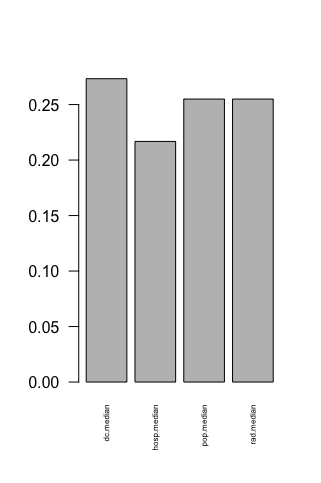

Il peut être utile de comparer la fréquence de sélection des différentes variables. Il est important de noter que ces fréquences ne doivent pas être utilisées comme une métrique d'importance variable. Le graphique à barres ci-dessous montre que  pop.median,n_tot_dose1,n_tot_dose2, dc.median et hosp.median sont les variables les plus fréquemment sélectionnées dans toute la forêt. 

Ces cinques variables sont les seules variables numériques de l'ensemble de données; les autres sont binaires, c'est-à-dire qu'elles ne peuvent jamais être utilisées consécutivement dans la même branche d'un arbre. 

Des mesures plus appropriées d'importance variable seront examinées ci-dessus.


# Prédiction
Lors de la prédiction des coefficients ou des réponses pour un point de données qui était dans l'ensemble d'apprentissage, nous avons la possibilité d'utiliser l'une des trois méthodes différentes, spécifiées par le paramètre «méthodes» dans predictYForestet predictCoeffsForest. Pour un point de données donné, nous pouvons soit faire la moyenne de sa prédiction sur tous les arbres de la forêt ( method = "all"), sur uniquement les arbres de la forêt pour lesquels ce point de données n'était pas dans le sous-échantillon aléatoire ( method="oob"), soit sur uniquement les arbres de la forêt pour lesquels ce point de données était dans le sous-échantillon aléatoire ( method="itb"). La oobméthode est préférée, car elle donne une impression de performances hors échantillon et évite de surappliquer les données d'apprentissage. Nous pouvons comparer les prédictions de réponse pour les méthodes arborescentes en fonction de leur degré de correspondance avec les réponses réelles. Comme prévu, leitb les prévisions correspondent beaucoup plus étroitement aux valeurs réelles.


In [ ]:
cor(dataf$rea, predictYForest(forest, method="oob"))
##[1] 0.7042923
cor(dataf$rea, predictYForest(forest, method="all"))
##[1] 0.7510536
cor(dataf$rea, predictYForest(forest, method="itb"))
##[1] 0.7673961
#Evaluating a Forest
yR2Forest(forest, method="oob")
## [1] 0.4879318
yR2Forest(forest, method="all")
## [1] 0.5512813
yR2Forest(forest, method="itb")
## [1]  0.5774052
projectedR2Forest(forest, method="oob", removeIntercept = FALSE)
##           [,1]
## [1,] 0.6414625
projectedR2Forest(forest, method="all", removeIntercept = FALSE)
##           [,1]
## [1,] 0.7367999
projectedR2Forest(forest, method="itb", removeIntercept = FALSE)
##           [,1]
## [1,]  0.7765417
projectedR2Forest(forest, method="oob", removeIntercept = TRUE)
##            [,1]
## [1,] 0.393377
projectedR2Forest(forest, method="all", removeIntercept = TRUE)
##           [,1]
## [1,] 0.4780249
projectedR2Forest(forest, method="itb", removeIntercept = TRUE)
##            [,1]
## [1,] 0.5152273

# Importances des variables

In [ ]:
Y_imps<- varImpY(forest, method="oob")
Y_imps
coeff_imps<- varImpCoeff(forest, method="oob", removeIntercept=FALSE)
shape_imps<- varImpCoeff(forest, method="oob", removeIntercept=TRUE)
par(mfrow=c(1,3))
plotImp(Y_imps[,3], main="Response")
plotImp(coeff_imps[,3], main = "Coeff w/ Intercept")
plotImp(shape_imps[,3], main = "Coeff w/out Intercept")

dans les resultats des importances des variables on voit les 2 variables de hosp.median et rad median qui sont les plus important dans toutes les 3 methodes . dans premier plot dc.median vient apres les 2 premiers , dans 2eme plot aussi mais dans le plot sans prise en compte l'intercpt nombre aides median est une variable importante pour faire les predictions.

#Conclusion
Les forêts splines sont des outils utiles pour comprendre quelles variables peuvent être associées à l'hétérogénéité des trajectoires longitudinales d'une population.
